Quantum Circuit:


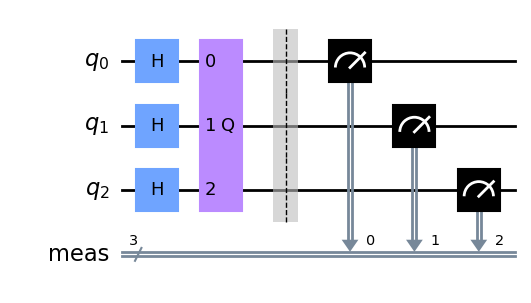

Grover's Algorithm Results: {'111': 132, '011': 119, '010': 129, '000': 120, '101': 123, '100': 117, '110': 128, '001': 132}


In [1]:
#-------------------------------------------------------------------------
# Quantum Grover for Material Search
# Chapter 5 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation required
#-------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import circuit_drawer
from qiskit.circuit.library import GroverOperator
#-------------------------------------------------------------------------

# Define the oracle
n = 3  # Number of qubits
oracle = QuantumCircuit(n)

 # Mark |110⟩ as the solution
oracle.z(2) 
oracle = GroverOperator(oracle)

# Initialize the quantum circuit
qc = QuantumCircuit(n)

# Apply Hadamard gates to place all qc gates in superposition
qc.h(range(n))  

# Apply the oracle and diffusion operator
qc.append(oracle, range(n))

# Measure the result
qc.measure_all()

# Visualize the circuit
print("Quantum Circuit:")
display(circuit_drawer(qc, output='mpl', style="iqp"))

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result    = execute(qc, simulator, shots=1000).result()
print("Grover's Algorithm Results:", result.get_counts())
